# Xử lý ngôn ngữ tự nhiên (NLP)

*   Dữ liệu cho NLP load từ file intents.json
*   Là quá trình training mô hình NLP



In [ ]:
import json

with open('intents.json', 'r') as f:
    intents = json.load(f)

intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'Hello', 'Yo'],
   'responses': ['Hi there',
    'What can I do for you',
    'Can I help you',
    'Hello, glad to help']},
  {'tag': 'abdominal_pain',
   'patterns': ['I have abdominal pain',
    'My abdomen hurts',
    'I have pain in stomach',
    'I feel pain in abdomen']},
  {'tag': 'abnormal_menstruation',
   'patterns': ['I have a heavy period',
    'Heavy flow on my period',
    'Period lasts longer than usual',
    'My period is really painful',
    'I have strong menstrual pain',
    'Menstrual cramps are strong']},
  {'tag': 'acidity',
   'patterns': ['I have acid reflux',
    'I have acidity problems',
    'I have heartburn']},
  {'tag': 'acute_liver_failure',
   'patterns': ['My liver hurts',
    'I have pain around liver',
    'Upper right abdomen hurts']},
  {'tag': 'altered_sensorium',
   'patterns': ["I can't think clearly",
    'It is hard to think',
    'I am unable to concentrate']},
  {'tag': 'anxiety',
   'pa

In [ ]:
all_words = []
tags = []
xy = []

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

for intent in intents['intents']:
    tag = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        all_words.extend(w)
        xy.append( (w, tag) )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
xy

[(['Hi'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Yo'], 'greeting'),
 (['I', 'have', 'abdominal', 'pain'], 'abdominal_pain'),
 (['My', 'abdomen', 'hurts'], 'abdominal_pain'),
 (['I', 'have', 'pain', 'in', 'stomach'], 'abdominal_pain'),
 (['I', 'feel', 'pain', 'in', 'abdomen'], 'abdominal_pain'),
 (['I', 'have', 'a', 'heavy', 'period'], 'abnormal_menstruation'),
 (['Heavy', 'flow', 'on', 'my', 'period'], 'abnormal_menstruation'),
 (['Period', 'lasts', 'longer', 'than', 'usual'], 'abnormal_menstruation'),
 (['My', 'period', 'is', 'really', 'painful'], 'abnormal_menstruation'),
 (['I', 'have', 'strong', 'menstrual', 'pain'], 'abnormal_menstruation'),
 (['Menstrual', 'cramps', 'are', 'strong'], 'abnormal_menstruation'),
 (['I', 'have', 'acid', 'reflux'], 'acidity'),
 (['I', 'have', 'acidity', 'problems'], 'acidity'),
 (['I', 'have', 'heartburn'], 'acidity'),
 (['My', 'liver', 'hurts'], 'acute_liver_failure'),
 (['I', 'have', 'pain', 'around', 'liver'], 'acute_liver_failure'),
 (['Upper'

In [ ]:
xy_test = [
    (['ca', "n't", 'think', 'straight'], 'altered_sensorium'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['bloody', 'poop'], 'bloody_stool'),
    (['blurred', 'vision'], 'blurred_and_distorted_vision'),
    (['ca', "n't", 'breathe'], 'breathlessness'),
    (['Yellow', 'liquid', 'pimple'], 'yellow_crust_ooze'),
    (['lost', 'weight'], 'weight_loss'),
    (['side', 'weaker'], 'weakness_of_one_body_side'),
    (['watering', 'eyes'], 'watering_from_eyes'),
    (['brief', 'blindness'], 'visual_disturbances'),
    (['throat', 'hurts'], 'throat_irritation'),
    (['extremities', 'swelling'], 'swollen_extremeties'),
    (['swollen', 'lymph', 'nodes'], 'swelled_lymph_nodes'),
    (['dark', 'under', 'eyes'], 'sunken_eyes'),
    (['stomach', 'blood'], 'stomach_bleeding'),
    (['blood', 'urine'], 'spotting_urination'),
    (['sinuses', 'hurt'], 'sinus_pressure'),
    (['watery', 'from', 'nose'], 'runny_nose'),
    (['have', 'to', 'move'], 'restlessness'),
    (['red', 'patches', 'body'], 'red_spots_over_body'),
    (['sneeze'], 'continuous_sneezing'),
    (['coughing'], 'cough'),
    (['skin', 'patches'], 'dischromic_patches'),
    (['skin', 'bruised'], 'bruising'),
    (['burning', 'pee'], 'burning_micturition'),
    (['hurts', 'pee'], 'burning_micturition'),
    (['Burning', 'sensation'], 'burning_micturition'),
    (['chest', 'pressure'], 'chest_pain'),
    (['pain', 'butt'], 'pain_in_anal_region'),
    (['heart', 'bad', 'beat'], 'palpitations'),
    (['fart', 'lot'], 'passage_of_gases'),
    (['cough', 'phlegm'], 'phlegm'),
    (['lot', 'urine'], 'polyuria'),
    (['Veins', 'bigger'], 'prominent_veins_on_calf'),
    (['Veins', 'emphasized'], 'prominent_veins_on_calf'),
    (['yellow', 'pimples'], 'pus_filled_pimples'),
    (['red', 'nose'], 'red_sore_around_nose'),
    (['skin', 'yellow'], 'yellowish_skin'),
    (['eyes', 'yellow'], 'yellowing_of_eyes'),
    (['large', 'thyroid'], 'enlarged_thyroid'),
    (['really', 'hunger'], 'excessive_hunger'),
    (['always', 'hungry'], 'excessive_hunger'),
]

In [ ]:
len(xy_test)

43

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

ignore_words = ['?', '!', '.', ',']
all_words = [stemmer.stem(w.lower()) for w in all_words if w not in ignore_words]
# all_words = [lemmatizer.lemmatize(w.lower()) for w in all_words]
all_words = sorted(set(all_words))
all_words

["'m",
 'a',
 'abdomen',
 'abdomin',
 'ach',
 'acid',
 'acn',
 'affair',
 'all',
 'also',
 'alway',
 'am',
 'amr',
 'an',
 'anal',
 'and',
 'angl',
 'ankl',
 'annoy',
 'anu',
 'anxiou',
 'anyth',
 'appetit',
 'are',
 'arm',
 'around',
 'at',
 'atrophi',
 'attack',
 'back',
 'bad',
 'bag',
 'balanc',
 'beat',
 'becaus',
 'been',
 'befor',
 'behind',
 'belli',
 'between',
 'bigger',
 'blackhead',
 'bladder',
 'bleed',
 'blind',
 'blister',
 'bloat',
 'blood',
 'bloodi',
 'blue',
 'blurri',
 'bodi',
 'breath',
 'brief',
 'bright',
 'brittl',
 'broken',
 'brown',
 'bruis',
 'bump',
 'burn',
 'burp',
 'butt',
 'ca',
 'calm',
 'can',
 'caugh',
 'chang',
 'chest',
 'chill',
 'circl',
 'clearli',
 'cold',
 'color',
 'coma',
 'comfort',
 'concentr',
 'congest',
 'constantli',
 'constip',
 'cough',
 'cramp',
 'crust',
 'dark',
 'darker',
 'deep',
 'dehydr',
 'dent',
 'depress',
 'diarrhoea',
 'differ',
 'difficulti',
 'discomfort',
 'diseas',
 'distort',
 'disturb',
 'dizzi',
 'do',
 'doe',
 'do

In [ ]:
tags = sorted(set(tags))
tags

['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'greeting',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sugar_l

In [ ]:
#Ví dụ về phương pháp túi từ

import numpy as np
from models.nlp_utils import bag_of_words

sentence = ['hello', 'how', 'are', 'you']
words = ['hi', 'hello', 'I', 'you', 'bye', 'thanks', 'cool']
bag_of_words(sentence, words)

array([0., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
x_train = []
y_train = []

for (pattern, tag) in xy:
    bag = bag_of_words(pattern, all_words)
    x_train.append(bag)

    label = tags.index(tag)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

array([ 43,  43,  43,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,
         2,   2,   2,   3,   3,   3,   4,   4,   4,   5,   5,   5,   6,
         6,   6,   7,   7,   7,   7,   7,   8,   8,   8,   9,   9,   9,
        10,  10,  10,  10,  11,  11,  12,  12,  12,  13,  13,  13,  14,
        14,  14,  14,  15,  15,  15,  16,  16,  16,  17,  17,  17,  18,
        18,  18,  19,  19,  19,  20,  20,  20,  20,  21,  21,  22,  22,
        22,  23,  23,  23,  24,  24,  24,  24,  25,  25,  25,  25,  26,
        26,  27,  27,  27,  28,  28,  29,  29,  29,  30,  30,  30,  31,
        31,  31,  32,  32,  32,  33,  33,  33,  33,  33,  34,  34,  34,
        34,  35,  35,  36,  36,  36,  37,  37,  38,  38,  38,  39,  39,
        39,  40,  40,  40,  40,  41,  41,  41,  41,  41,  41,  42,  42,
        42,  44,  44,  44,  45,  45,  45,  46,  46,  47,  47,  47,  48,
        48,  48,  49,  49,  49,  50,  50,  50,  51,  51,  51,  52,  52,
        52,  52,  53,  53,  53,  54,  54,  54,  55,  55,  56,  5

In [ ]:
x_test = []
y_test = []

for (pattern, tag) in xy_test:
    bag = bag_of_words(pattern, all_words)
    x_test.append(bag)

    label = tags.index(tag)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
y_test

array([  4,   5,   5,  12,  13,  14, 127, 126, 124, 122, 120, 116, 114,
       110, 108, 106, 104,  98,  93,  92,  90,  24,  25,  31,  16,  17,
        17,  17,  18,  77,  79,  80,  82,  83,  84,  84,  86,  89, 130,
       129,  35,  36,  36])

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
class ChatDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.n_samples = len(X_data)
        self.x_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return  self.n_samples

In [ ]:
from models.neural_network import NeuralNetwork
from sklearn.metrics import accuracy_score

batch_size = 8
hidden_size = 8
output_size = len(tags)
input_size = len(all_words)
learning_rates = [0.01, 0.05, 0.1, 0.15]
num_epochs = 1000

def nn_validation():
    dataset_train = ChatDataset(x_train, y_train)

    train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=2)

    device = torch.device('cpu')
    model = NeuralNetwork(input_size, hidden_size, output_size).to(device)

    loss_train = []
    loss_test = []

    for lr in learning_rates:
        # loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.ASGD(model.parameters(), lr=lr)

        print(f"lr: {lr}, train")
        for epoch in range(num_epochs):
            for (words, labels) in train_loader:
                words = words.to(device)
                labels = labels.to(device)

                outputs = model(words)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if (epoch + 1) % (num_epochs / 2) == 0:
                print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

        print(f'final loss = {loss.item():.4f}')
        loss_train.append(loss.item())

        y_predicted = []

        for x in x_test:

            x = x.reshape(1, x.shape[0])
            x = torch.from_numpy(x)

            output = model(x)
            _, predicted = torch.max(output, dim=1)
            y_pred = predicted.item()
            y_predicted.append(y_pred)


        print("y_predicted:", y_predicted)
        y_predicted = np.array(y_predicted)

        loss_test.append(accuracy_score(y_test, y_predicted))
        print()

    return loss_train, loss_test

In [ ]:
train_errors, test_errors = nn_validation()

lr: 0.01, train
epoch 500/1000, loss = 0.0423
epoch 1000/1000, loss = 0.0375
final loss = 0.0375
y_predicted: [119, 43, 43, 87, 13, 126, 121, 22, 43, 122, 117, 79, 41, 110, 108, 88, 23, 56, 93, 92, 94, 24, 25, 31, 35, 17, 17, 81, 18, 77, 39, 14, 82, 17, 81, 84, 121, 89, 130, 129, 35, 40, 68]

lr: 0.05, train
epoch 500/1000, loss = 0.0164
epoch 1000/1000, loss = 0.0067
final loss = 0.0067
y_predicted: [119, 43, 43, 87, 13, 126, 121, 126, 43, 122, 35, 79, 41, 110, 108, 88, 23, 56, 93, 92, 2, 24, 25, 31, 35, 17, 17, 68, 18, 77, 39, 49, 82, 83, 84, 84, 121, 89, 130, 129, 46, 36, 36]

lr: 0.1, train
epoch 500/1000, loss = 0.0057
epoch 1000/1000, loss = 0.0049
final loss = 0.0049
y_predicted: [119, 43, 43, 87, 13, 126, 121, 126, 43, 122, 120, 81, 41, 110, 108, 88, 23, 56, 93, 92, 2, 24, 25, 97, 52, 17, 17, 68, 18, 77, 39, 14, 82, 83, 84, 84, 121, 89, 130, 129, 35, 36, 36]

lr: 0.15, train
epoch 500/1000, loss = 0.0058
epoch 1000/1000, loss = 0.0059
final loss = 0.0059
y_predicted: [4, 43, 43

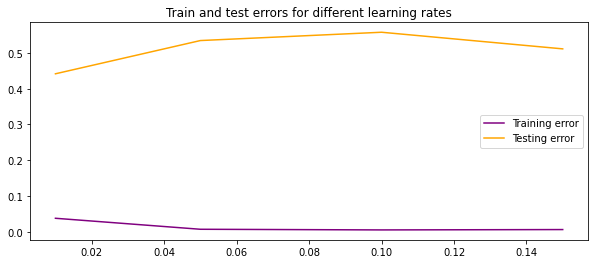

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))

plt.title("Train and test errors for different learning rates")
plt.plot(learning_rates, train_errors, c='purple', label='Training error')
plt.plot(learning_rates, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
from models.neural_network import NeuralNetwork

batch_size = 8
hidden_size = 8
output_size = len(tags) 
input_size = len(all_words)
learning_rate = 0.01
num_epochs = 1000

dataset = ChatDataset(x_train, y_train)
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

device = torch.device('cpu') 
model = NeuralNetwork(input_size, hidden_size, output_size).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(device)
        
        outputs = model(words)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % (num_epochs / 10) == 0:
        print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

print(f'final loss = {loss.item():.4f}')

epoch 100/1000, loss = 4.8146
epoch 200/1000, loss = 3.8833
epoch 300/1000, loss = 2.5026
epoch 400/1000, loss = 1.6221
epoch 500/1000, loss = 0.7044
epoch 600/1000, loss = 0.2743
epoch 700/1000, loss = 0.7023
epoch 800/1000, loss = 0.0181
epoch 900/1000, loss = 0.3252
epoch 1000/1000, loss = 0.1440
final loss = 0.1440


In [ ]:
data = {
    "model_state": model.state_dict(),
    "input_size": input_size,
    "output_size": output_size,
    "all_words": all_words,
    "tags": tags,
    "hidden_size": hidden_size
}

FILE = "data.pth"
torch.save(data, FILE)

In [1]:
# Symptom prediction
sentence = "My head hurts"
sentence =  nltk.word_tokenize(sentence)
x = bag_of_words(sentence, all_words)
x = x.reshape(1, x.shape[0])
x = torch.from_numpy(x)

output = model(x)
_, predicted = torch.max(output, dim=1)
tag = tags[predicted.item()]

probs = torch.softmax(output, dim=1)
prob = probs[0][predicted.item()]

print("prob:  ", prob)

tag

NameError: name 'nltk' is not defined

## **Chuyển đổi dữ liệu bệnh**
Với mỗi triệu chứng sẽ là một cột, nếu triệu chứng là đặc điểm của 1 loại bệnh thì set là giá trị cột là 1, không phải thì set là 0

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("data/dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,Impetigo,skin_rash,high_fever,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Impetigo,skin_rash,high_fever,blister,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
symptoms = np.concatenate((df.Symptom_1.unique(), df.Symptom_2.unique(), df.Symptom_3.unique(), df.Symptom_4.unique(), 
                          df.Symptom_5.unique(), df.Symptom_6.unique(), df.Symptom_7.unique(), df.Symptom_8.unique(), 
                          df.Symptom_9.unique(), df.Symptom_10.unique(), df.Symptom_11.unique(), df.Symptom_12.unique(), 
                          df.Symptom_13.unique(), df.Symptom_14.unique(), df.Symptom_15.unique(), df.Symptom_16.unique(), 
                          df.Symptom_17.unique()))

In [ ]:
symptoms_unique = list(set(symptoms))

In [ ]:
symptoms_unique

[nan,
 ' muscle_wasting',
 ' visual_disturbances',
 ' blackheads',
 ' weakness_in_limbs',
 ' rusty_sputum',
 ' slurred_speech',
 ' swelled_lymph_nodes',
 ' swelling_of_stomach',
 ' swelling_joints',
 ' family_history',
 ' internal_itching',
 ' redness_of_eyes',
 ' receiving_unsterile_injections',
 ' acute_liver_failure',
 ' joint_pain',
 ' swollen_legs',
 ' cramps',
 ' chills',
 ' bruising',
 ' foul_smell_of urine',
 ' passage_of_gases',
 ' loss_of_balance',
 ' restlessness',
 ' extra_marital_contacts',
 ' dischromic _patches',
 ' stiff_neck',
 ' dizziness',
 ' throat_irritation',
 ' lack_of_concentration',
 ' increased_appetite',
 ' skin_peeling',
 ' blurred_and_distorted_vision',
 ' dark_urine',
 ' vomiting',
 ' bladder_discomfort',
 ' nodal_skin_eruptions',
 ' nausea',
 ' yellow_urine',
 ' polyuria',
 ' chest_pain',
 ' pain_behind_the_eyes',
 ' movement_stiffness',
 ' bloody_stool',
 ' cough',
 ' abnormal_menstruation',
 ' hip_joint_pain',
 ' fatigue',
 ' cold_hands_and_feets',
 ' s

In [ ]:
len(symptoms_unique)

132

In [ ]:
i = 18
for each in symptoms_unique:
  df.insert(i, each, 0)
  i = i + 1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
df = df.fillna(0)

In [ ]:
for index, row in df.iterrows():
  disease_symptoms = [symptom for symptom in list(row)[1:] if symptom != 0]
  for each in disease_symptoms:
    df.at[index, each] = 1


In [ ]:
df = df.drop(columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 
             'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16'
             , 'Symptom_17'])

In [ ]:
df = df.loc[:, df.columns.notnull()]
df.columns = df.columns.str.replace(" ", "")
df = df.reindex(sorted(df.columns), axis=1)

In [ ]:
list(df.columns)

['Disease',
 'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irr

# Dữ liệu mô tả bệnh và cách đề phòng

In [ ]:
disease_description = pd.read_csv("data/symptom_Description.csv")
disease_description['Disease'] = disease_description['Disease'].apply(lambda x: x.lower().strip(" "))

In [ ]:
disease_precaution = pd.read_csv("data/symptom_precaution.csv")
disease_precaution['Disease'] = disease_precaution['Disease'].apply(lambda x: x.lower().strip(" "))

In [ ]:
disease_description

,Disease,Description
0,drug reaction,An adverse drug reaction (ADR) is an injury ca...
1,malaria,An infectious disease caused by protozoan para...
2,allergy,An allergy is an immune system response to a f...
3,hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,psoriasis,Psoriasis is a common skin disorder that forms...
5,gerd,"Gastroesophageal reflux disease, or GERD, is a..."
6,chronic cholestasis,"Chronic cholestatic diseases, whether occurrin..."
7,hepatitis a,Hepatitis A is a highly contagious liver infec...
8,osteoarthristis,Osteoarthritis is the most common form of arth...
9,(vertigo) paroymsal positional vertigo,Benign paroxysmal positional vertigo (BPPV) is...


In [ ]:
disease_precaution

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,drug reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,allergy,apply calamine,cover area with bandage,keep a diary,use ice to compress itching
3,hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,gerd,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis a,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) paroymsal positional vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [ ]:
symptom_severity = pd.read_csv("data/Symptom-severity.csv")
symptom_severity = symptom_severity.applymap(lambda s: s.lower().strip(" ").replace(" ", "") if type(s) == str else s)

# Xây dựng model học máy

In [ ]:
labels = df.to_numpy()[:, :1]
examples = df.to_numpy()[:, 1:]
list_of_symptoms = list(df.columns)[1:]

with open('data/list_of_symptoms.pickle', 'wb') as data_file: 
    pickle.dump(list_of_symptoms, data_file)

print(len(labels))
print(len(examples))
print(len(list_of_symptoms))

304
304
131


In [ ]:
#Test
symptoms = ['headache', 'itching', 'cough']
X_test = []

with open('data/list_of_symptoms.pickle', 'rb') as data_file:
  symptom_list = pickle.load(data_file)

for each in symptom_list:
  if each in symptoms:
    X_test.append(1)
    
  else:
    X_test.append(0)


X_test = np.asarray(X_test)

In [ ]:

def cross_validation(x_train, y_train, x_test, y_test, model_name, parameter_range=50): 
    train_errors = []
    test_errors = []
    
    parameters = np.linspace(1, parameter_range, parameter_range, dtype=int)
    
    for parameter in parameters: 
        if model_name == 'knn':            
            model = KNeighborsClassifier(n_neighbors=parameter, metric='cosine')
        elif model_name == 'logreg':
            model = LogisticRegression(solver='liblinear', C=1/(parameter*20))
        elif model_name == 'dctree':
            model = DecisionTreeClassifier(splitter='random', max_depth=parameter)
        elif model_name =='svm': 
            model = SVC(C=1/(parameter*10))
            
        model.fit(x_train, y_train)
        learning_error = 1 - model.score(x_train, y_train) 
        testing_error = 1 - model.score(x_test, y_test)
        train_errors.append(learning_error)
        test_errors.append(testing_error)
    
    if model_name == 'logreg':
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*20)
    elif model_name == 'svm': 
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*10)
    else: 
        best_parameter_value = parameters[np.argmin(test_errors)]
    
    return parameters, best_parameter_value, train_errors, test_errors

In [ ]:
#kNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, metric='cosine')
x_train, x_test, y_train, y_test = train_test_split(examples, labels.ravel(), test_size=0.2)
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='cosine', n_neighbors=7)

In [ ]:
disease = knn.predict(X_test.reshape(1,-1))[0]
print(disease)

Chicken pox


In [ ]:
knn.score(x_test, y_test)

0.9016393442622951

In [ ]:
#Additional information about disease and precautions

description = disease_description.loc[disease_description['Disease'] == disease.strip(" ").lower(), 'Description'].iloc[0]
print(description)

precaution = disease_precaution[disease_precaution['Disease'] == disease.strip(" ").lower()]
sentence = 'Precautions: ' + precaution.Precaution_1.iloc[0] + ", " + precaution.Precaution_2.iloc[0] + ", " + precaution.Precaution_3.iloc[0] + ", " + precaution.Precaution_4.iloc[0]
print(sentence)


Chickenpox is a highly contagious disease caused by the varicella-zoster virus (VZV). It can cause an itchy, blister-like rash. The rash first appears on the chest, back, and face, and then spreads over the entire body, causing between 250 and 500 itchy blisters.
Precautions: use neem in bathing , consume neem leaves, take vaccine, avoid public places


In [ ]:
symptoms = ['stomach_pain', 'headache', 'coma'] 
severity = []

for each in symptoms: 
    severity.append(symptom_severity.loc[symptom_severity['Symptom'] == each.lower().strip(" ").replace(" ", ""), 'weight'].iloc[0])

if np.mean(severity) > 4 or np.max(severity) > 5:
    print("Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)")


Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)


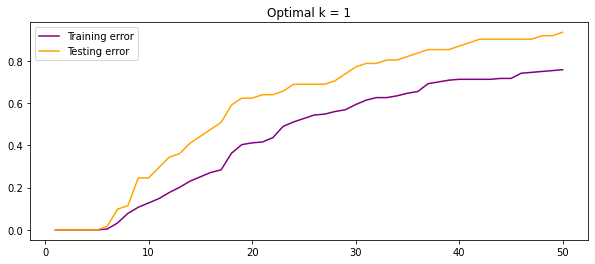

In [ ]:
k_range = 20

fig = plt.figure(figsize=(10,4))


k, best_k, train_errors, test_errors = cross_validation(x_train, y_train, x_test, y_test, model_name='knn')
plt.title(f"Optimal k = {best_k}")
plt.plot(k, train_errors, c='purple', label='Training error')
plt.plot(k, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
# Cay quyet dinh

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter='random', max_depth=100)

dc_tree= clf.fit(x_train, y_train)
dc_tree.predict(X_test.reshape(1,-1))

array(['Fungal infection'], dtype=object)

In [ ]:
dc_tree.score(x_test, y_test)

0.6885245901639344

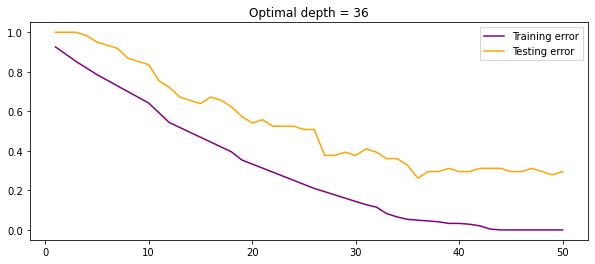

In [ ]:
fig = plt.figure(figsize=(10,4))

depth, best_depth, train_errors, test_errors = cross_validation(x_train, y_train, x_test, y_test, model_name='dctree')
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depth, train_errors, c='purple', label='Training error')
plt.plot(depth, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=0.05)

logreg.fit(x_train, y_train)
logreg.predict(X_test.reshape(1,-1))

array(['Common Cold'], dtype=object)

In [ ]:
logreg.score(x_test, y_test)

0.8852459016393442

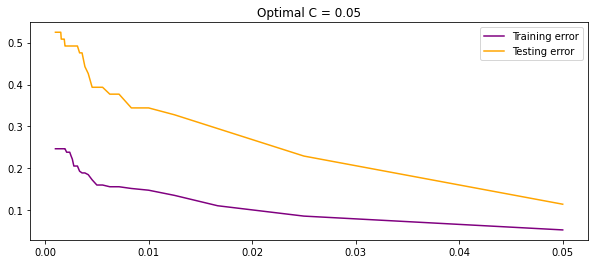

In [ ]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(x_train, y_train, x_test, y_test, model_name='logreg')
c_reg = []
for each in c: 
    c_reg.append(1/(each*20))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [ ]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(C=0.3)
svm.fit(x_train, y_train)
svm.predict(X_test.reshape(1,-1))

array(['Drug Reaction'], dtype=object)

In [ ]:
svm.score(x_test, y_test)

0.7704918032786885

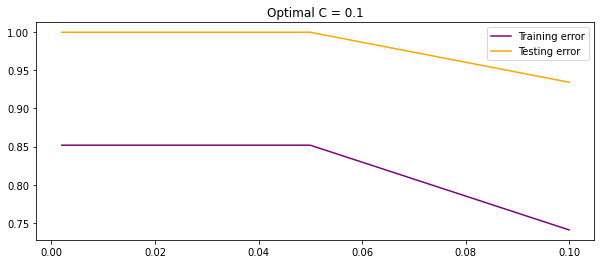

In [ ]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(x_train, y_train, x_test, y_test, model_name='svm')
c_reg = []
for each in c: 
    c_reg.append(1/(each*10))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

# Essemble Learning

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression(solver='liblinear', C=0.03)))
    level0.append(('knn', KNeighborsClassifier(n_neighbors=6, metric='cosine')))
    level0.append(('dctree', DecisionTreeClassifier(splitter='random', max_depth=34)))
    level0.append(('svm', SVC(C=0.1)))

    level1 = LogisticRegression()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return level0, model

lr 0.962714 (0.014065)
knn 1.000000 (0.000000)
dctree 0.608525 (0.037255)
svm 0.185246 (0.018835)
ensemble 0.788233 (0.064818)


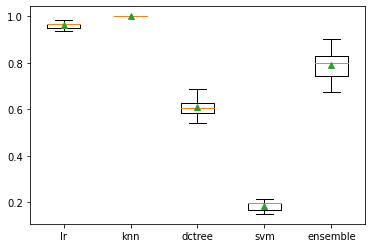

In [ ]:
models, model = get_stacking()
results, names = list(), list()

for each in models:
    scores = evaluate_model(each[1], examples, labels)
    results.append(scores)
    names.append(each[0])
    print('%s %f (%f)' % (each[0], np.mean(scores), np.std(scores)))

ensemble_score = evaluate_model(model, examples, labels)
results.append(ensemble_score)
names.append('ensemble')
print('%s %f (%f)' % ('ensemble', np.mean(ensemble_score), np.std(ensemble_score)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:


model.fit(examples, labels.ravel())

with open('data/fitted_model.pickle', 'wb') as modelFile:
    model_final = pickle.dump(model, modelFile)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
with open('data/fitted_model.pickle', 'rb') as modelFile:
    model_final = pickle.load(modelFile)

predicted = model_final.predict(X_test.reshape(1, -1))[0]
print(f'Predicted Class: {predicted}')

Predicted Class: Hypertension 


In [ ]:
#Condition number of X_train 

print(np.linalg.cond(examples.astype(int)))